# Corona Tweets 
In we will continue to look at a collection of tweets about covid-19. Since it contains more than 179.000 tweets we need an alternative way to observe the data. In the previous notebook we used wordclouds to look at the tweets. However, fequencies are a limited way of interpreting what is important in a textual dataset. Today we will be using Word2Vec - a method that allows for exploring textual data with more semantic knowledge


## Data downloaden

If you haven't downloaded the data already you can obtain them here:  https://www.kaggle.com/datasets/gpreda/covid19-tweets?select=covid19_tweets.csv

Download the file, and upload it in the Google Colab environment, or put it in the directory where your notebook is.

In [1]:
import pandas as pd

tweets = pd.read_csv('covid19_tweets.csv')
tweets.columns = tweets.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
import nltk; nltk.download('stopwords')

In [3]:
from nltk.corpus import stopwords
import re


stop_words = stopwords.words("english")

def cleanup_tweet(text):
    text = str(text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www.\S+', '', text)
    text = text.replace('RT ', ' ')
    text = text.replace('&amp;', 'and')
    text = text.replace(r'[^A-Za-z0-9]+', ' ')
    text = text.lower()
    return text

def sent_to_words(sentence):
    """
    divides sentence into words and removes punctuations
    """
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(doc):
    """
    removes stopwords
    """
    return [word for word in gensim.utils.simple_preprocess(str(doc)) if word not in stop_words]


def preprocess_text(text):
    clean_text = cleanup_tweet(text)
    data_words = list(sent_to_words(clean_text))
    data_words = remove_stopwords(data_words)
    return data_words

In [4]:
import gensim
# clean text
tweets = tweets.dropna(subset=['text'])
tweets['preprocessed'] = tweets['text'].apply(preprocess_text)


# Model training

With the code below, we will train a model specifically on the tweets in our dataset

In [5]:
model = gensim.models.Word2Vec(tweets['preprocessed'], vector_size=25, window=5, 
                 min_count=1, workers=4)
model.save("corona_tweets_w2v.model")

In [6]:
model = gensim.models.Word2Vec.load("corona_tweets_w2v.model")

# Model Visualisation

With TSNE - a tool for visualizing high dimensional data - we can visualize the word embeddings. We can define key-terms and determine which relations exists. There is a lot of discussion about the interpretation of TSNE graphs, so remember that the distances in the graph do not always mean what we expect them to mean. Nevertheless it serves the purpose of a first visualisation


In [ ]:
# Visulaize Word Embeddings
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(20, 20))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=10)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


def plot_tsne(keywords, model):

  embedding_clusters = []
  word_clusters = []
  for word in keys:
      embeddings = []
      words = []
      for similar_word, _ in model.most_similar(word, topn=10):
          words.append(similar_word)
          embeddings.append(model[similar_word])
      embedding_clusters.append(embeddings)
      word_clusters.append(words)



  embedding_clusters = np.array(embedding_clusters)
  n, m, k = embedding_clusters.shape
  tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
  embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

  tsne_plot_similar_words('Similar words', keywords, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')



keys = ['corona', 'death', 'lockdown', 'symptom', 'vaccine', 'president']
plot_tsne(keys, model.wv)


## Exercise 1

Try at least 2 different sets of keywords and observe the visualisation. What strikes out?

# Model inspection

We can also look at the relations the word2vec model finds. This provides insight on a semantic (or syntactic) level on how words in tweets are related to each other. In the next exercise we will look at the words that have obtained similar vectors (so occur in the same context). We could also use this method (by comparing to positive and negative similarities) to look at analogies.


## Exercise 2

Below there are a couple of suggestions for interesting terms. What do you see?
Try at least 2 new terms



In [8]:
model.wv.most_similar(positive=["corona"])

[('worldnews', 0.8370525240898132),
 ('coronainfoch', 0.8064602017402649),
 ('covid_', 0.80268394947052),
 ('nzcovid', 0.7910528182983398),
 ('whoops', 0.7876901626586914),
 ('covid__', 0.7785108685493469),
 ('griechenland', 0.776389479637146),
 ('source', 0.7757803797721863),
 ('realnews', 0.7744590640068054),
 ('ausairforce', 0.7704583406448364)]

In [9]:
model.wv.most_similar(positive=["trump","death"])


[('trumpvirus', 0.856201171875),
 ('votetrump', 0.8235912919044495),
 ('potus', 0.8216851353645325),
 ('donaldtrump', 0.821632981300354),
 ('coviddeaths', 0.8205642104148865),
 ('trumphasnoplan', 0.8196073770523071),
 ('texastribune', 0.8110409379005432),
 ('claims', 0.8101445436477661),
 ('trumprally', 0.8101373910903931),
 ('hassanrahim', 0.8075385093688965)]

In [10]:
model.wv.most_similar(positive=["wuhan"])

[('coronaoutbreak', 0.905924916267395),
 ('coronarvirues', 0.8946593999862671),
 ('israel', 0.8899939060211182),
 ('reuters', 0.8836338520050049),
 ('strains', 0.8833656311035156),
 ('china', 0.8710024356842041),
 ('grenada', 0.8686230778694153),
 ('mln', 0.8683812618255615),
 ('finland', 0.8680549263954163),
 ('mass', 0.8661512732505798)]

In [11]:
model.wv.most_similar(positive=["tired"])

[('honestly', 0.9827853441238403),
 ('okay', 0.9774624109268188),
 ('stuff', 0.9635558724403381),
 ('anymore', 0.962169349193573),
 ('scared', 0.9619933366775513),
 ('afraid', 0.9603491425514221),
 ('yeah', 0.9579803943634033),
 ('realize', 0.9552590847015381),
 ('either', 0.9535675048828125),
 ('else', 0.953113317489624)]

In [12]:
model.wv.most_similar(positive=["impact","covid"])

[('ongoing', 0.9190685153007507),
 ('current', 0.9153141379356384),
 ('growing', 0.8980256915092468),
 ('impacts', 0.8896331191062927),
 ('arising', 0.8872680068016052),
 ('unprecedented', 0.8852413892745972),
 ('effect', 0.8734350204467773),
 ('significant', 0.8714250922203064),
 ('related', 0.8672987222671509),
 ('changes', 0.8641040921211243)]

Word2Vec cannot create vectors for words that are out of vocabulary. There are variations on word2vec, such as FastText that use subwords that are able to create vectors and comparison for words that were not part of the training data. You can observe the differences by retraining your model with the FastText implementation in Gensim

# Clustering Tweets on their word vectors

The word vectors we have trained are hard to evaluate intrinsically. Usually we use the vectors in other applications. For example, we can look at which tweets are more similar by clustering them based on their word2vec similarities.
Cluster algorithms use distance or similarity measures. Textual data cannot be used directly to calculate the distance, because the data is not numerical. That is why the word vectors - a numerical representation of the texts -  are so useful.

We will now cluster the tweets based on their word vectors. We need 1 vector per tweet, which means that we need to do some averaging to describe the whole tweet. Then we use Kmeans to find the clusters.

We use the wordclouds again to visualise the content of the clusters and see whether we can find differences between the clusters.




## Exercise 3
- Are there differences in the clusters?
- What hapens if you increase or decrease the number of clusters?


*Extra*: Gensim also has an implementation of Doc2Vec. Instead of averaging vectors, it uses a different tactic to describe a set of words. Do you see a difference? https://radimrehurek.com/gensim/auto_examples/tutorials/run_doc2vec_lee.html#sphx-glr-auto-examples-tutorials-run-doc2vec-lee-py

In [17]:
from sklearn.cluster import KMeans
import numpy as np


def makeFeatureVec(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    nwords = 0.
    index2word_set = set(model.index_to_key) 

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(twts, model, num_features):
    counter = 0
    tweetFeatureVecs = np.zeros((len(twts),num_features),dtype="float32")

    for tw in twts:
      if counter%1000. == 0.:
           print( "Tweet %d of %d" % (counter, len(twts)))
      fv = makeFeatureVec(tw, model, num_features)
      if np.isnan(fv).any():
        print("skipping - nan in fv for: ", tw)
      else:
        tweetFeatureVecs[counter] = fv
        counter +=1
    return tweetFeatureVecs





In [19]:

subset_tweets = tweets.sample(n=3000) # we gebruiken even een sample om de code wat efficienter te maken

tweet_vectors = getAvgFeatureVecs(subset_tweets['preprocessed'], model.wv, 25)

# we exploreren 4 clusters
kmeans = KMeans(n_clusters = 4,init ='k-means++', max_iter=300, random_state=0)
y_kmeans =  kmeans.fit_predict(tweet_vectors)
subset_tweets['Cluster']  = y_kmeans

Tweet 0 of 3000
Tweet 1000 of 3000
Tweet 2000 of 3000


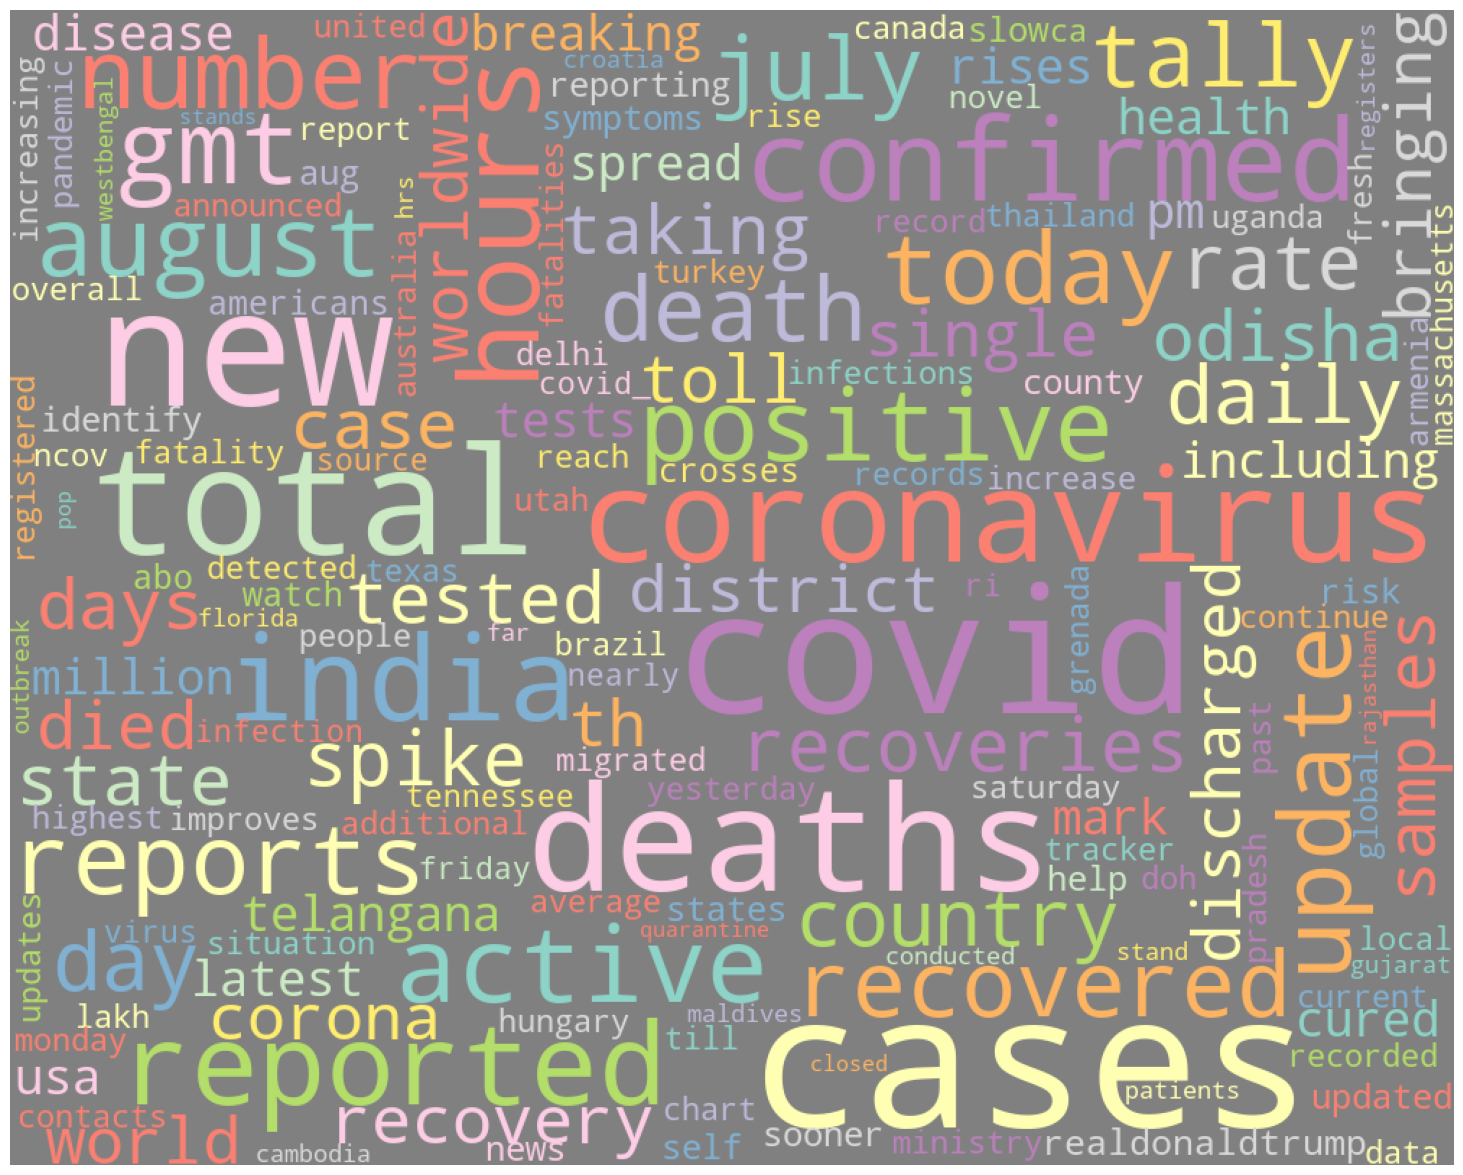

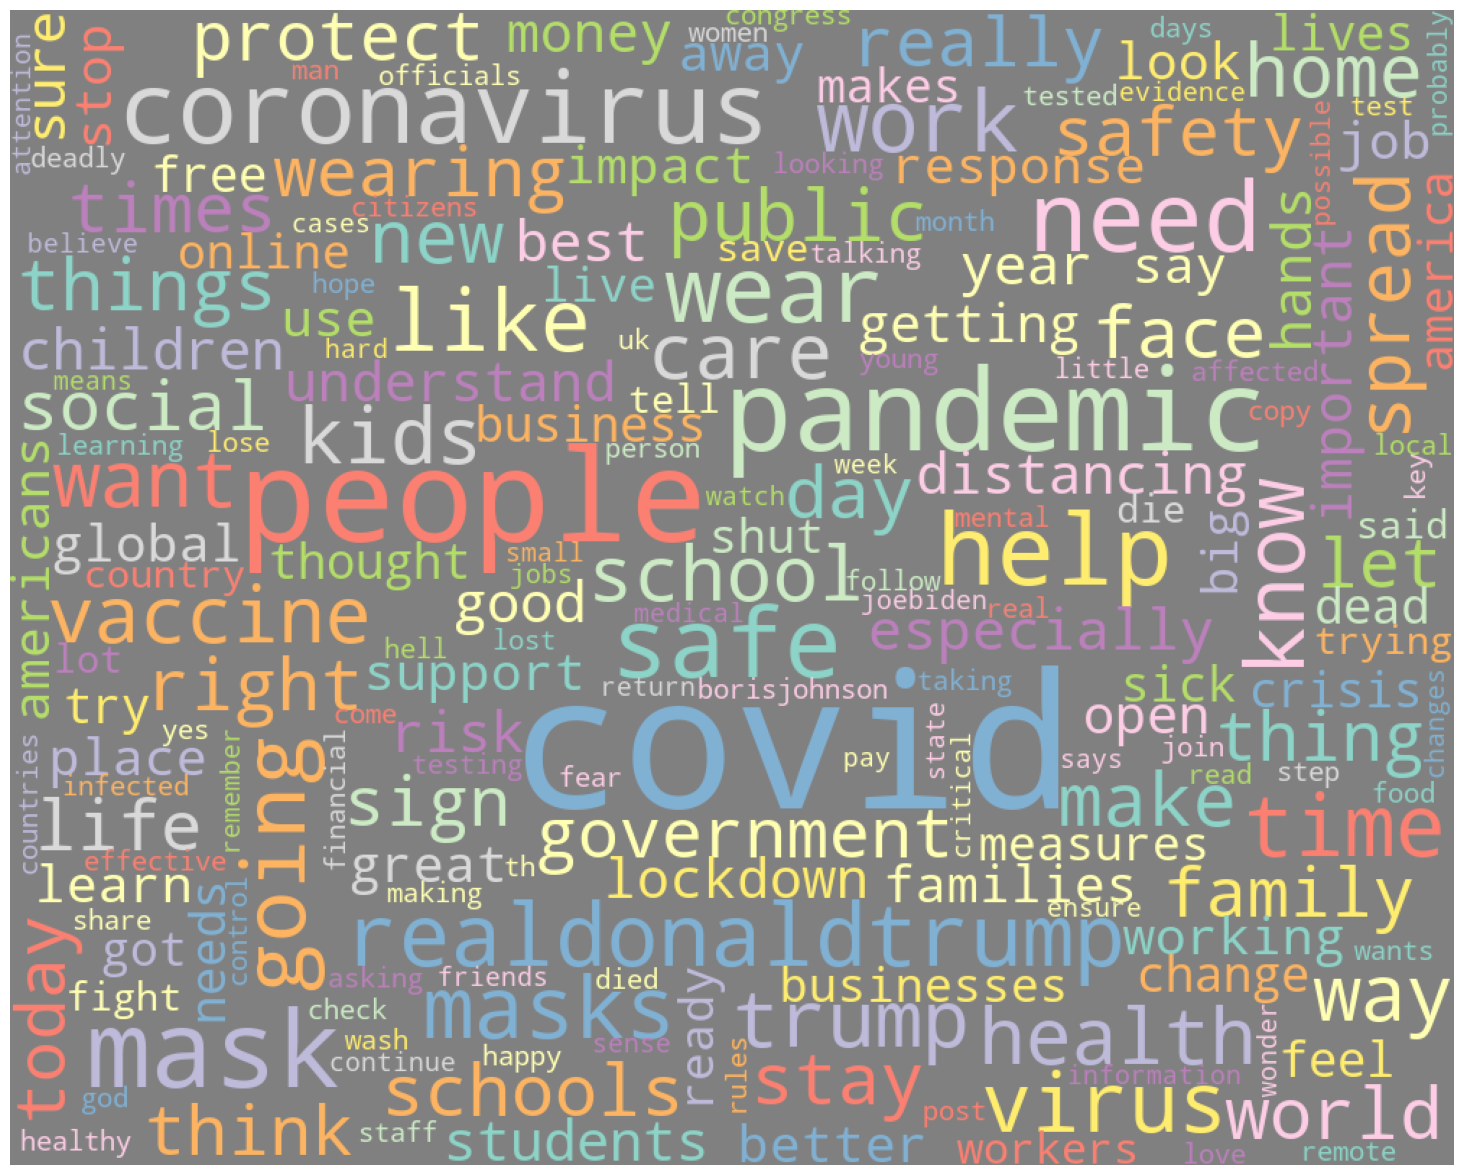

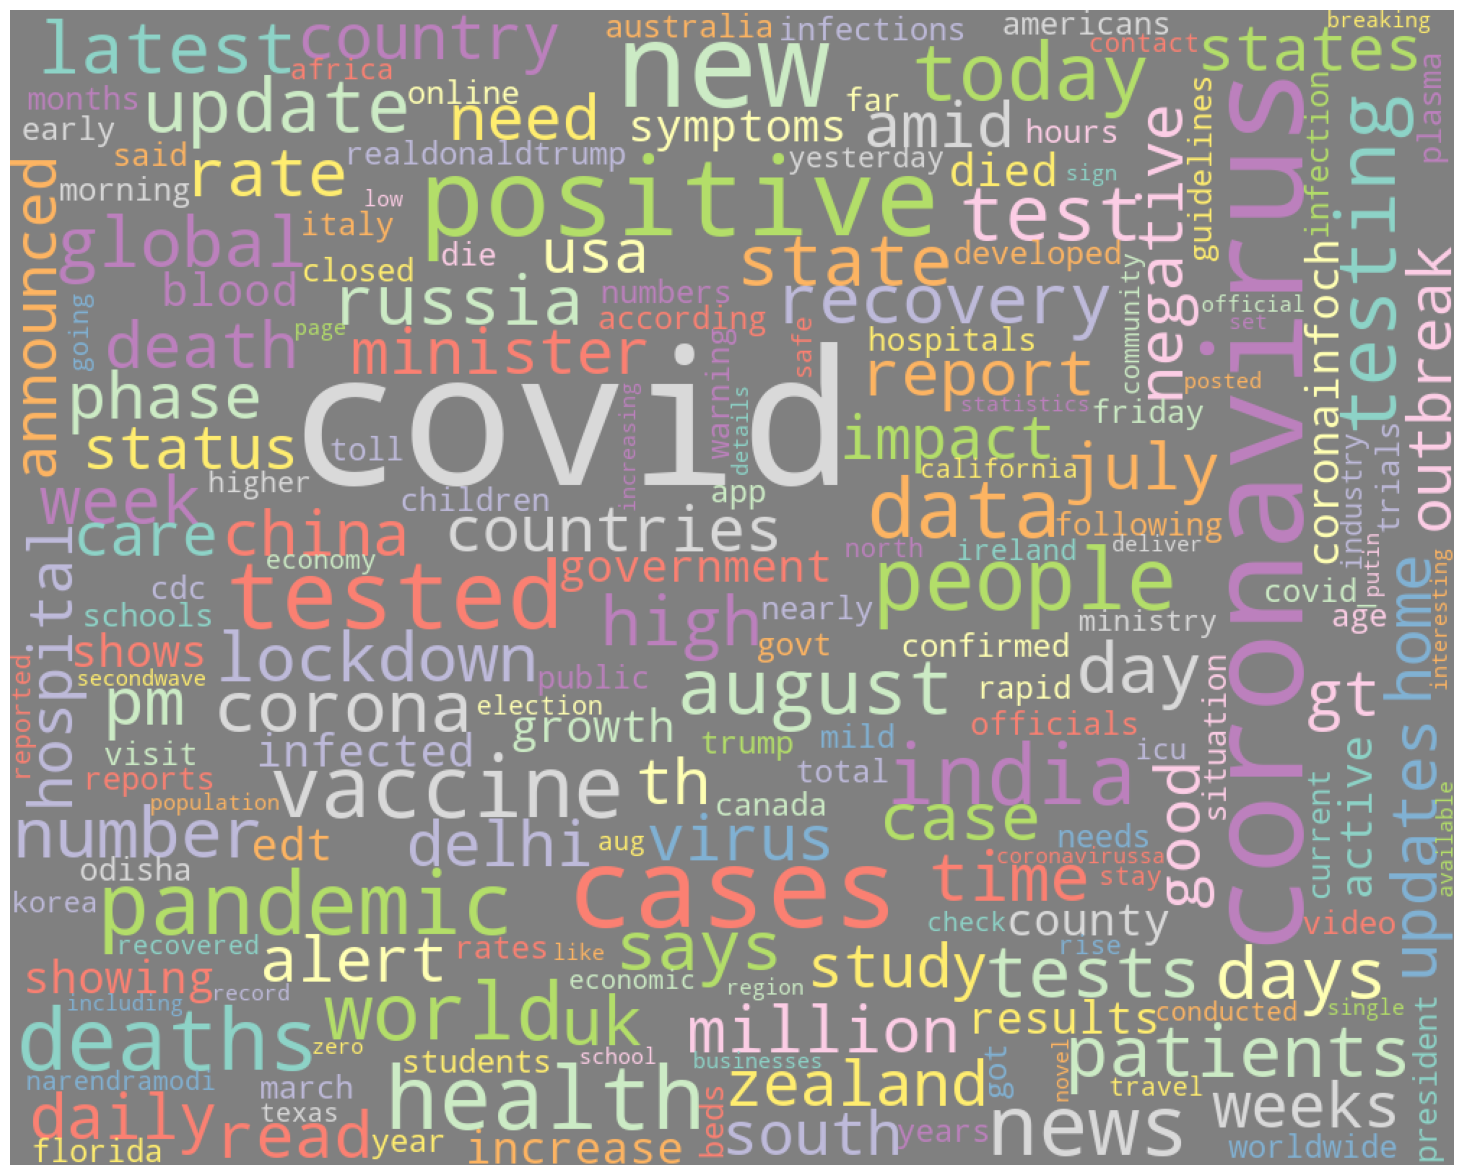

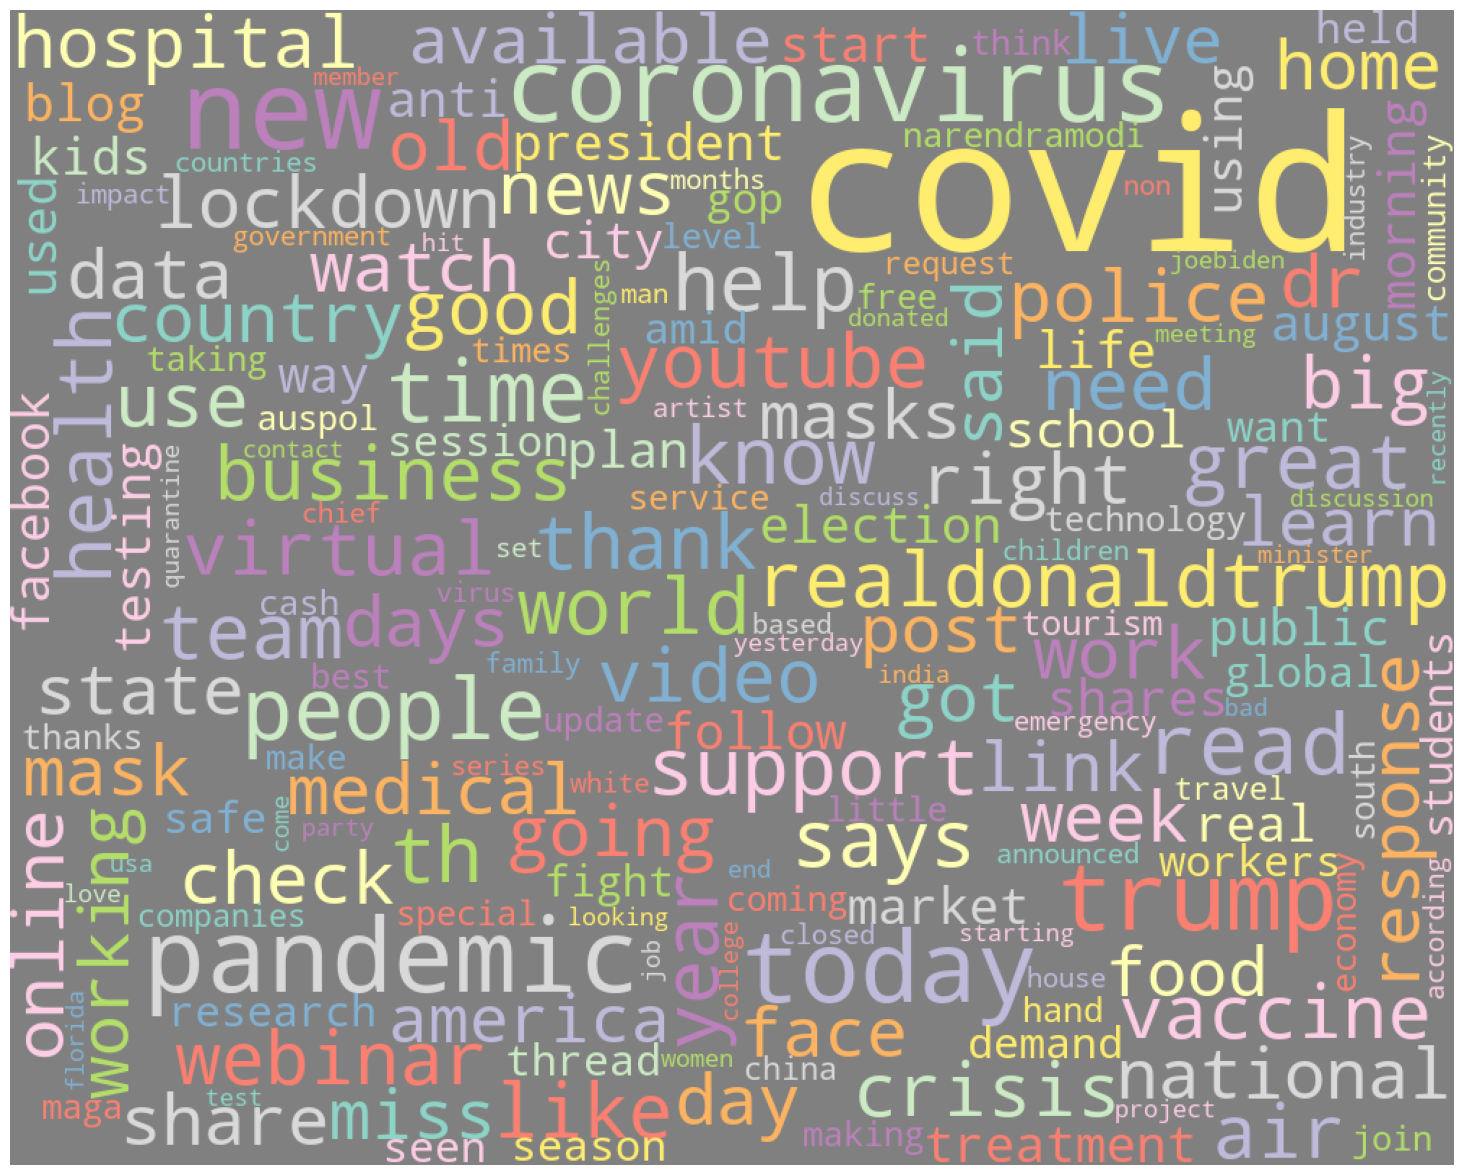

In [26]:
from wordcloud import STOPWORDS, WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

def better_wordcloud(df, feature, stopword_set):
    rows = [" ".join(el) if isinstance(el, list) else str(el) for el in df[feature]]
    #data = " ".join(rows)

    vectorizer = TfidfVectorizer(stop_words='english')
    vecs = vectorizer.fit_transform(rows)
    feature_names = vectorizer.get_feature_names_out()
    dense = vecs.todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)

    wordcloud = WordCloud(width = 1000,
                         height = 800,
                         stopwords = stopword_set,
                         collocations=False,
                         colormap = 'Set3',
                         margin = 0,
                         max_words = 200,
                         min_word_length = 4,
                         max_font_size = 130, min_font_size = 15,
                         background_color ='gray').generate_from_frequencies(df.T.sum(axis=1))
    plt.figure(figsize = (20,15))
    plt.imshow(wordcloud)
    plt.axis('off')

better_wordcloud(subset_tweets[subset_tweets['Cluster'] == 0] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster'] == 1] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster'] == 2] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster'] == 3] , 'preprocessed', STOPWORDS)

# GLOVE vectors

Until now we worked with our own vectors. The advantage of a self-trained model is that you control the data that goes in which allows for a more specialized view on the data. The downside is that you miss generic relations and that you are limited in the vocabulary

There are pretrained word vector models available that have been trained on large datasets. We will now look at the difference of such a model compared to the model we trained ourselves. For this purpose we use the GLOVE vectors in the gensim package.

In [13]:
import gensim.downloader as api
glove_vectors = api.load('glove-twitter-25')

In [14]:
glove_vectors.most_similar('wuhan')

[('hubei', 0.9057658910751343),
 ('changsha', 0.8796625733375549),
 ('haneda', 0.8775801062583923),
 ('pudong', 0.8767338991165161),
 ('aiport', 0.8752138614654541),
 ('kaohsiung', 0.8689464926719666),
 ('daekyung', 0.8640855550765991),
 ('yeongdeungpo', 0.8631269931793213),
 ('h&g', 0.8617295622825623),
 ('chengdu', 0.8589527606964111)]

## Exercise 4

Compare the following similar words with similar words according to our own model:

- Wuhan
- corona
- trump
- tired

Wat do you see? What matches? What is different?

## Exercise 5
How does the TSNE plot of the GLOVE vectors differ from our own model? Which is more insightful?


In [ ]:
plot_tsne(keys, glove_vectors)

## Exercise 6

We can use the GLOVE vectors as input for the cluster algorithm. Do you see any differences in the wordclouds compared to the clusters based on our own model?

Is there a difference in the distribution over clusters (number of tweets in each cluster)?


In [ ]:
#  GLOVE VECTORS
tweet_glove_vectors = getAvgFeatureVecs(subset_tweets['preprocessed'], glove_vectors, 25)

In [ ]:
kmeans_glove = KMeans(n_clusters = 4,init ='k-means++', max_iter=300, random_state=0)
y_kmeans_glove =  kmeans_glove.fit_predict(tweet_glove_vectors)
subset_tweets['Cluster_GLOVE']  = y_kmeans_glove

In [ ]:
better_wordcloud(subset_tweets[subset_tweets['Cluster_GLOVE'] == 0] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster_GLOVE'] == 1] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster_GLOVE'] == 2] , 'preprocessed', STOPWORDS)
better_wordcloud(subset_tweets[subset_tweets['Cluster_GLOVE'] == 3] , 'preprocessed', STOPWORDS)